In [18]:
# IMPORTING REQUIRED PACKAGES ->
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np

import random

In [19]:
# a> LOADING AND PRE-PROCESSING THE IMAGE DATA
mnist = tf.keras.datasets.mnist
(x_train,y_train), (x_test,y_test) = mnist.load_data() # Splitting into training
input_shape = (28, 28, 1)

In [20]:
# Making sure that the values are float so that we can get decimal points after
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [21]:
#print("Data Type of x_train:", x_train.dtype)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [22]:
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train = x_train / 255
x_test = x_test / 255
print("Shape of Training : ",x_train.shape)
print("Shape of Testing: ",x_test.shape)

Shape of Training :  (60000, 28, 28, 1)
Shape of Testing:  (10000, 28, 28, 1)


In [23]:
# b) DEFINING THE MODEL'S ARCHITECTURE
model = Sequential()
model.add(Conv2D (28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense (200, activation = "relu"))
model.add(Dropout (0.3))
model.add(Dense (10, activation = "softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 28)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 4732)              0         
                                                                 
 dense_2 (Dense)             (None, 200)               946600    
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                2010      
                                                      

In [24]:
# c) TRAINING THE MODEL - <
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs= 2)

Epoch 1/2
1875/1875 [==============================] - 59s 31ms/step - loss: 0.1969 - accuracy: 0.9408
Epoch 2/2
1875/1875 [==============================] - 57s 31ms/step - loss: 0.0847 - accuracy: 0.9736


In [25]:
# d) ESTIMATING THE MODEL'S PERFORMANCE
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Loss-%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

313/313 [==============================] - 3s 8ms/step - loss: 0.0582 - accuracy: 0.9806
Loss-0.058
Accuracy=0.981


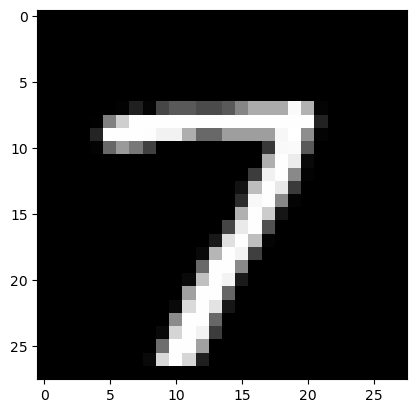

In [27]:
# Showing image at position [] from dataset:

n = random.randint(0, 9999)

image = x_train[n]
plt.imshow(np.squeeze(image), cmap='gray')
plt.show()

In [28]:
# Predicting the class of image:
image=image.reshape(1, image.shape[0], image.shape[1], image.shape[2])
predict_model = model.predict([image])
print("Pedicted class: {}".format(np.argmax(predict_model)))

1/1 [==============================] - 0s 105ms/step
Pedicted class: 7
